# Montar a tabela do [C/2014 L4](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/C2011-L4-PANSTARRS.html), [C/2013 R1](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/C2013-R1-Lovejoy.html), [C/2012 J1](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/C2012-J1-Catalina.html), [168P](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/168P-Hergenrother.html). [C/2010 S1](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/C2010%20S1%20Linear.html), [C/2012 S1](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/C2012-S1-ISON.html), [41P](https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/41P-Tuttle-Giacobini-Kresak.html)

In [1]:
import urllib.request
import tempfile
from lxml import html
import numpy as np
import pandas as pd
import re
from astropy.time import Time

In [2]:
import matplotlib.pyplot as plt
import scipy.optimize as optimization
import statsmodels.api as sm

In [43]:
url = "https://www.astronomie.be/alfons.diepvens/cometimages/comet/photometry/41P-Tuttle-Giacobini-Kresak.html"
page = re.sub('\*',' ',urllib.request.urlopen(url).read().decode("utf-8"))

In [44]:
print(page) # confira se está ok


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<title>41P Tuttle-Giacobini-Kresak</title>
<link href="../../CSS/tumb-horiz-2.css" rel="stylesheet" type="text/css" />
<script src="../../CSS/click_gallery.js" type="text/javascript"></script>
<link href="../../CSS/tekstvak-scroll.css" rel="stylesheet" type="text/css" />
<script type="text/javascript">
<!--
function MM_reloadPage(init) {  //reloads the window if Nav4 resized
  if (init==true) with (navigator) {if ((appName=="Netscape")&&(parseInt(appVersion)==4)) {
    document.MM_pgW=innerWidth; document.MM_pgH=innerHeight; onresize=MM_reloadPage; }}
  else if (innerWidth!=document.MM_pgW || innerHeight!=document.MM_pgH) location.reload();
}
MM_reloadPage(true);
//-->
</script>
<link href="../../CSS/menu.css" rel="stylesheet" type="text/css" />


In [45]:
a = '''
C/2012 S1     28/09/2012 02:09:39  17.59  17.16  17.25                        2.0  21.3  C23
C/2012 S1     28/09/2012 02:09:39   0.04   0.10   0.11                          2   6.0  CMC

'''
page = re.sub(a,'\n',page)

a = '''

C/2012 S1     11/11/2012 03:28:56  17.06  16.81  16.78  16.83                10.0  19.1  C23
C/2012 S1     11/11/2012 03:28:56   0.05   0.13   0.15   0.28                   7   3.3  CMC
'''
page = re.sub(a,'\n',page)

a = '''

C/2012 S1     08/12/2012 03:59:51  16.59  16.32  16.37                        8.5  18.5  C23
C/2012 S1     08/12/2012 03:59:51   0.05   0.05   0.09                          7   4.3  CMC
'''
page = re.sub(a,'\n',page)

a = '''

C/2012 S1     12/03/2013 21:51:04  15.97  15.66  15.61                       10.5  18.1  C23
C/2012 S1     12/03/2013 21:51:04   0.04   0.07   0.11                         10   3.1  CMC

C/2012 S1     14/03/2013 21:47:41  15.97  15.64  15.63                       11.9  18.5  C23
C/2012 S1     14/03/2013 21:47:41   0.04   0.10   0.15                         10   2.6  CMC
'''
page = re.sub(a,'\n',page)

a = '''

C/2012 S1     30/03/2013 20:56:00  16.04  15.76  15.67  15.71  15.80          6.2  17.3  C23
C/2012 S1     30/03/2013 20:56:00   0.09   0.17   0.23   0.26   0.25           12   2.8  CMC
'''
page = re.sub(a,'\n',page)
print(page)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<title>41P Tuttle-Giacobini-Kresak</title>
<link href="../../CSS/tumb-horiz-2.css" rel="stylesheet" type="text/css" />
<script src="../../CSS/click_gallery.js" type="text/javascript"></script>
<link href="../../CSS/tekstvak-scroll.css" rel="stylesheet" type="text/css" />
<script type="text/javascript">
<!--
function MM_reloadPage(init) {  //reloads the window if Nav4 resized
  if (init==true) with (navigator) {if ((appName=="Netscape")&&(parseInt(appVersion)==4)) {
    document.MM_pgW=innerWidth; document.MM_pgH=innerHeight; onresize=MM_reloadPage; }}
  else if (innerWidth!=document.MM_pgW || innerHeight!=document.MM_pgH) location.reload();
}
MM_reloadPage(true);
//-->
</script>
<link href="../../CSS/menu.css" rel="stylesheet" type="text/css" />


Constrói a tabela pelo site

In [46]:
ini = page.find('---\n')
fim = page.find('CMC\n\n\n')
txtable = page[(ini+4):(fim+3)]
print(txtable)

41P           04/01/2017 23:28:36  17.38  16.81  16.50  16.33  16.19  16.15   4.2  18.1  C23
41P           04/01/2017 23:28:36   0.22   0.21   0.16   0.21   0.24   0.33     7   4.3  CMC

41P           19/01/2017 00:12:59  16.42  15.78  15.43  15.18  14.97  14.80  11.0  18.3  C23
41P           19/01/2017 00:12:59   0.04   0.06   0.09   0.12   0.13   0.13     8   3.4  CMC

41P           19/01/2017 22:35:29  16.27  15.64  15.30  15.01  14.80  14.64  13.8  18.5  C23
41P           19/01/2017 22:35:29   0.04   0.05   0.07   0.08   0.09   0.09    10   3.5  CMC

41P           25/01/2017 23:47:27  15.63  14.99  14.68  14.43  14.24  14.09  19.2  18.5  C23
41P           25/01/2017 23:47:27   0.03   0.03   0.04   0.04   0.05   0.05    10   3.3  CMC

41P           02/02/2017 01:43:21  15.20  14.50  14.18  13.93  13.73  13.58  17.8  18.4  C23
41P           02/02/2017 01:43:21   0.02   0.03   0.04   0.05   0.05   0.05    12   3.5  CMC

41P           13/02/2017 20:47:46  13.91  13.19  12.85  12.62  12

In [47]:
with tempfile.TemporaryFile() as f:
    f.write(bytes(txtable,'UTF-8'))
    f.seek(0)
    TEMP = pd.read_table(f,sep='\s+',header=None)
TEMP

0           1         2      3      4      5      6      7      8     9   \
0   41P  04/01/2017  23:28:36  17.38  16.81  16.50  16.33  16.19  16.15   4.2   
1   41P  04/01/2017  23:28:36   0.22   0.21   0.16   0.21   0.24   0.33   7.0   
2   41P  19/01/2017  00:12:59  16.42  15.78  15.43  15.18  14.97  14.80  11.0   
3   41P  19/01/2017  00:12:59   0.04   0.06   0.09   0.12   0.13   0.13   8.0   
4   41P  19/01/2017  22:35:29  16.27  15.64  15.30  15.01  14.80  14.64  13.8   
5   41P  19/01/2017  22:35:29   0.04   0.05   0.07   0.08   0.09   0.09  10.0   
6   41P  25/01/2017  23:47:27  15.63  14.99  14.68  14.43  14.24  14.09  19.2   
7   41P  25/01/2017  23:47:27   0.03   0.03   0.04   0.04   0.05   0.05  10.0   
8   41P  02/02/2017  01:43:21  15.20  14.50  14.18  13.93  13.73  13.58  17.8   
9   41P  02/02/2017  01:43:21   0.02   0.03   0.04   0.05   0.05   0.05  12.0   
10  41P  13/02/2017  20:47:46  13.91  13.19  12.85  12.62  12.42  12.26  26.8   
11  41P  13/02/2017  20:47:46   0.02   0.01   0.01   0.02   0.02   0.02  11.0   
12  41P  15/02/2017  19:05:55  13.88  13.17  12.83  12.59  12.39  12.22  20.9   
13  41P  15/02/2017  19:05:55   0.01   0.04   0.04   0.03   0.03   0.03   2.0   
14  41P  18/02/2017  22:31:02  13.83  13.07  12.69  12.45  12.27  12.12  32.4   
15  41P  18/02/2017  22:31:02   0.01   0.01   0.02   0.02   0.01   0.01  11.0   
16  41P  24/02/2017  21:24:06  13.60  12.83  12.42  12.14  11.94  11.78  52.4   
17  41P  24/02/2017  21:24:06   0.01   0.01   0.01   0.02   0.02   0.02  11.0   
18  41P  09/03/2017  22:22:30  13.30  12.42  11.98  11.69  11.46  11.27  36.8   
19  41P  09/03/2017  22:22:30   0.02   0.01   0.01   0.02   0.02   0.02  12.0   
20  41P  12/03/2017  19:19:11  13.17  12.31  11.84  11.54  11.31  11.11  37.3   
21  41P  12/03/2017  19:19:11   0.02   0.02   0.01   0.01   0.02   0.02  10.0   
22  41P  15/03/2017  20:26:04  13.08  12.25  11.79  11.47  11.23  11.04  49.0   
23  41P  15/03/2017  20:26:04   0.02   0.01   0.01   0.01   0.01   0.01   9.0   
24  41P  22/03/2017  01:27:32  13.54  12.62  12.13  11.80  11.55  11.36  37.2   
25  41P  22/03/2017  01:27:32   0.02   0.01   0.01   0.01   0.01   0.02   8.0   
26  41P  24/03/2017  20:59:42  13.09  12.21  11.74  11.41  11.16  10.96  35.2   
27  41P  24/03/2017  20:59:42   0.03   0.02   0.02   0.02   0.02   0.02  10.0   
28  41P  25/03/2017  21:40:23  13.36  12.48  12.00  11.67  11.41  11.21  38.6   
29  41P  25/03/2017  21:40:23   0.02   0.02   0.02   0.02   0.01   0.01   9.0   
..  ...         ...       ...    ...    ...    ...    ...    ...    ...   ...   
56  41P  13/05/2017  22:48:05  13.61  12.67  12.18  11.83  11.55  11.32  24.9   
57  41P  13/05/2017  22:48:05   0.02   0.02   0.03   0.03   0.02   0.02   7.0   
58  41P  20/05/2017  22:23:46  13.77  12.90  12.45  12.12  11.85  11.61  27.1   
59  41P  20/05/2017  22:23:46   0.08   0.05   0.03   0.03   0.03   0.03   6.0   
60  41P  21/05/2017  22:53:24  13.87  12.95  12.47  12.13  11.87  11.65  23.2   
61  41P  21/05/2017  22:53:24   0.01   0.02   0.02   0.03   0.03   0.03   8.0   
62  41P  24/05/2017  23:48:29  13.59  12.79  12.33  12.00  11.75  11.54  35.5   
63  41P  24/05/2017  23:48:29   0.02   0.02   0.02   0.02   0.02   0.02   8.0   
64  41P  27/05/2017  00:56:02  13.96  13.03  12.56  12.23  11.97  11.76  28.9   
65  41P  27/05/2017  00:56:02   0.01   0.01   0.03   0.02   0.01   0.01   6.0   
66  41P  01/06/2017  00:00:36  14.00  13.15  12.70  12.39  12.14  11.93  25.5   
67  41P  01/06/2017  00:00:36   0.02   0.01   0.03   0.03   0.02   0.02   9.0   
68  41P  10/06/2017  00:32:27  14.40  13.47  13.00  12.65  12.38  12.16   9.8   
69  41P  10/06/2017  00:32:27   0.04   0.07   0.06   0.04   0.04   0.04   8.0   
70  41P  13/06/2017  23:52:38  14.64  13.72  13.28  12.95  12.68  12.45  13.0   
71  41P  13/06/2017  23:52:38   0.04   0.05   0.07   0.06   0.05   0.05  10.0   
72  41P  16/06/2017  23:17:19  14.65  13.76  13.34  13.03  12.76  12.55  10.6   
73  41P  16/06/2017  23:17:19   0.05

In [48]:
#tabela = pd.DataFrame({'Cometa':TEMP[0].astype('str')+' '+TEMP[1].astype('str'),
tabela = pd.DataFrame({'time':TEMP[1].astype('str')+' '+TEMP[2].astype('str'),
                       'B10':TEMP[3],
                       'B20':TEMP[4],
                       'B30':TEMP[5],
                       'B40':TEMP[6],
                       'B50':TEMP[7],
                       'B60':TEMP[8],
                       'SNR':TEMP[9],
                       'SB' :TEMP[10],
                       'COD':TEMP[11]})
del(TEMP)

tabela

time    B10    B20    B30    B40    B50    B60   SNR    SB  \
0   04/01/2017 23:28:36  17.38  16.81  16.50  16.33  16.19  16.15   4.2  18.1   
1   04/01/2017 23:28:36   0.22   0.21   0.16   0.21   0.24   0.33   7.0   4.3   
2   19/01/2017 00:12:59  16.42  15.78  15.43  15.18  14.97  14.80  11.0  18.3   
3   19/01/2017 00:12:59   0.04   0.06   0.09   0.12   0.13   0.13   8.0   3.4   
4   19/01/2017 22:35:29  16.27  15.64  15.30  15.01  14.80  14.64  13.8  18.5   
5   19/01/2017 22:35:29   0.04   0.05   0.07   0.08   0.09   0.09  10.0   3.5   
6   25/01/2017 23:47:27  15.63  14.99  14.68  14.43  14.24  14.09  19.2  18.5   
7   25/01/2017 23:47:27   0.03   0.03   0.04   0.04   0.05   0.05  10.0   3.3   
8   02/02/2017 01:43:21  15.20  14.50  14.18  13.93  13.73  13.58  17.8  18.4   
9   02/02/2017 01:43:21   0.02   0.03   0.04   0.05   0.05   0.05  12.0   3.5   
10  13/02/2017 20:47:46  13.91  13.19  12.85  12.62  12.42  12.26  26.8  17.5   
11  13/02/2017 20:47:46   0.02   0.01   0.01   0.02   0.02   0.02  11.0   4.5   
12  15/02/2017 19:05:55  13.88  13.17  12.83  12.59  12.39  12.22  20.9  17.6   
13  15/02/2017 19:05:55   0.01   0.04   0.04   0.03   0.03   0.03   2.0   5.4   
14  18/02/2017 22:31:02  13.83  13.07  12.69  12.45  12.27  12.12  32.4  18.5   
15  18/02/2017 22:31:02   0.01   0.01   0.02   0.02   0.01   0.01  11.0   4.3   
16  24/02/2017 21:24:06  13.60  12.83  12.42  12.14  11.94  11.78  52.4  18.8   
17  24/02/2017 21:24:06   0.01   0.01   0.01   0.02   0.02   0.02  11.0   3.0   
18  09/03/2017 22:22:30  13.30  12.42  11.98  11.69  11.46  11.27  36.8  17.2   
19  09/03/2017 22:22:30   0.02   0.01   0.01   0.02   0.02   0.02  12.0   3.3   
20  12/03/2017 19:19:11  13.17  12.31  11.84  11.54  11.31  11.11  37.3  17.1   
21  12/03/2017 19:19:11   0.02   0.02   0.01   0.01   0.02   0.02  10.0   4.0   
22  15/03/2017 20:26:04  13.08  12.25  11.79  11.47  11.23  11.04  49.0  18.5   
23  15/03/2017 20:26:04   0.02   0.01   0.01   0.01   0.01   0.01   9.0   3.3   
24  22/03/2017 01:27:32  13.54  12.62  12.13  11.80  11.55  11.36  37.2  19.5   
25  22/03/2017 01:27:32   0.02   0.01   0.01   0.01   0.01   0.02   8.0   3.9   
26  24/03/2017 20:59:42  13.09  12.21  11.74  11.41  11.16  10.96  35.2  18.9   
27  24/03/2017 20:59:42   0.03   0.02   0.02   0.02   0.02   0.02  10.0   4.5   
28  25/03/2017 21:40:23  13.36  12.48  12.00  11.67  11.41  11.21  38.6  19.3   
29  25/03/2017 21:40:23   0.02   0.02   0.02   0.02   0.01   0.01   9.0   3.9   
..                  ...    ...    ...    ...    ...    ...    ...   ...   ...   
56  13/05/2017 22:48:05  13.61  12.67  12.18  11.83  11.55  11.32  24.9  17.5   
57  13/05/2017 22:48:05   0.02   0.02   0.03   0.03   0.02   0.02   7.0   3.4   
58  20/05/2017 22:23:46  13.77  12.90  12.45  12.12  11.85  11.61  27.1  18.3   
59  20/05/2017 22:23:46   0.08   0.05   0.03   0.03   0.03   0.03   6.0   3.7   
60  21/05/2017 22:53:24  13.87  12.95  12.47  12.13  11.87  11.65  23.2  18.6   
61  21/05/2017 22:53:24   0.01   0.02   0.02   0.03   0.03   0.03   8.0   4.2   
62  24/05/2017 23:48:29  13.59  12.79  12.33  12.00  11.75  11.54  35.5  18.4   
63  24/05/2017 23:48:29   0.02   0.02   0.02   0.02   0.02   0.02   8.0   3.9   
64  27/05/2017 00:56:02  13.96  13.03  12.56  12.23  11.97  11.76  28.9  18.9   
65  27/05/2017 00:56:02   0.01   0.01   0.03   0.02   0.01   0.01   6.0   3.5   
66  01/06/2017 00:00:36  14.00  13.15  12.70  12.39  12.14  11.93  25.5  18.1   
67  01/06/2017 00:00:36   0.02   0.01   0.03   0.03   0.02   0.02   9.0   3.7   
68  10/06/2017 00:32:27  14.40  13.47  13.00  12.65  12.38  12.16   9.8  16.8   
69  10/06/2017 00:32:27   0.04   0.07   0.06   0.04   0.04   0.04   8.0   5.2   
70  13/06/2017 23:52:38  14.64  13.72  13.28  12.95  12.68  12.45  13.0  17.7   
71  13/06/2017 23:52:38   0.04   0.05   0.07   0.06   0.05   0.05  10.0   4.3   
72  16/06/2017 23:17:19  14.65  13.76  13.34  13.03  12.76  12.55  10.6  18.0   
73  16/06/2017 23:17:19   0.05   0.06   0.05   0.0

In [49]:
tabela = tabela.iloc[0::2].assign(errB10=tabela.iloc[1::2,1].values,
                                  errB20=tabela.iloc[1::2,2].values,
                                  errB30=tabela.iloc[1::2,3].values,
                                  errB40=tabela.iloc[1::2,4].values,
                                  errB50=tabela.iloc[1::2,5].values,
                                  errB60=tabela.iloc[1::2,6].values)
tabela = tabela[['time','B10','errB10','B20','errB20','B30','errB30','B40','errB40','B50','errB50','B60','errB60',
                'SNR','SB']]
tabela

time    B10  errB10    B20  errB20    B30  errB30    B40  \
0   04/01/2017 23:28:36  17.38    0.22  16.81    0.21  16.50    0.16  16.33   
2   19/01/2017 00:12:59  16.42    0.04  15.78    0.06  15.43    0.09  15.18   
4   19/01/2017 22:35:29  16.27    0.04  15.64    0.05  15.30    0.07  15.01   
6   25/01/2017 23:47:27  15.63    0.03  14.99    0.03  14.68    0.04  14.43   
8   02/02/2017 01:43:21  15.20    0.02  14.50    0.03  14.18    0.04  13.93   
10  13/02/2017 20:47:46  13.91    0.02  13.19    0.01  12.85    0.01  12.62   
12  15/02/2017 19:05:55  13.88    0.01  13.17    0.04  12.83    0.04  12.59   
14  18/02/2017 22:31:02  13.83    0.01  13.07    0.01  12.69    0.02  12.45   
16  24/02/2017 21:24:06  13.60    0.01  12.83    0.01  12.42    0.01  12.14   
18  09/03/2017 22:22:30  13.30    0.02  12.42    0.01  11.98    0.01  11.69   
20  12/03/2017 19:19:11  13.17    0.02  12.31    0.02  11.84    0.01  11.54   
22  15/03/2017 20:26:04  13.08    0.02  12.25    0.01  11.79    0.01  11.47   
24  22/03/2017 01:27:32  13.54    0.02  12.62    0.01  12.13    0.01  11.80   
26  24/03/2017 20:59:42  13.09    0.03  12.21    0.02  11.74    0.02  11.41   
28  25/03/2017 21:40:23  13.36    0.02  12.48    0.02  12.00    0.02  11.67   
30  26/03/2017 20:15:23  13.09    0.02  12.26    0.02  11.78    0.01  11.44   
32  30/03/2017 02:37:40  13.21    0.02  12.36    0.02  11.87    0.02  11.53   
34  02/04/2017 01:20:03  13.16    0.05  12.24    0.03  11.72    0.03  11.37   
36  02/04/2017 21:40:09  13.17    0.03  12.26    0.02  11.76    0.02  11.41   
38  03/04/2017 21:15:38  12.63    0.02  11.74    0.01  11.24    0.02  10.88   
40  09/04/2017 21:37:27  13.37    0.02  12.41    0.02  11.87    0.01  11.51   
42  13/04/2017 20:21:59  13.53    0.02  12.59    0.02  12.06    0.01  11.70   
44  17/04/2017 21:31:03  13.56    0.02  12.62    0.01  12.08    0.01  11.70   
46  19/04/2017 22:23:21  13.35    0.03  12.33    0.04  11.79    0.04  11.42   
48  23/04/2017 21:58:35  13.38    0.02  12.42    0.01  11.89    0.01  11.52   
50  26/04/2017 22:51:55  13.55    0.03  12.56    0.04  12.02    0.04  11.65   
52  28/04/2017 22:55:04  13.48    0.01  12.51    0.02  11.98    0.03  11.61   
54  08/05/2017 23:33:38  13.74    0.01  12.80    0.01  12.28    0.01  11.92   
56  13/05/2017 22:48:05  13.61    0.02  12.67    0.02  12.18    0.03  11.83   
58  20/05/2017 22:23:46  13.77    0.08  12.90    0.05  12.45    0.03  12.12   
60  21/05/2017 22:53:24  13.87    0.01  12.95    0.02  12.47    0.02  12.13   
62  24/05/2017 23:48:29  13.59    0.02  12.79    0.02  12.33    0.02  12.00   
64  27/05/2017 00:56:02  13.96    0.01  13.03    0.01  12.56    0.03  12.23   
66  01/06/2017 00:00:36  14.00    0.02  13.15    0.01  12.70    0.03  12.39   
68  10/06/2017 00:32:27  14.40    0.04  13.47    0.07  13.00    0.06  12.65   
70  13/06/2017 23:52:38  14.64    0.04  13.72    0.05  13.28    0.07  12.95   
72  16/06/2017 23:17:19  14.65    0.05  13.76    0.06  13.34    0.05  13.03   
74  19/06/2017 23:37:05  14.79    0.02  13.91    0.02  13.46    0.03  13.14   
76  26/06/2017 22:18:04  14.81    0.04  13.74    0.04  13.36    0.04  13.06   
78  01/07/2017 22:35:54  15.14    0.04  14.22    0.05  13.75    0.05  13.38   
80  05/07/2017 22:52:25  15.35    0.09  14.49    0.08  13.97    0.08  13.56   
82  12/07/2017 23:11:28  15.82    0.08  14.86    0.04  14.36    0.06  13.99   
84  27/07/2017 23:53:47  16.84    0.12  16.03    0.07  15.65    0.12  15.41   

    errB40    B50  errB50    B60  errB60   SNR    SB  
0     0.21  16.19    0.24  16.15    0.33   4.2  18.1  
2     0.12  14.97    0.13  14.80    0.13  11.0  18.3  
4     0.08  14.80    0.09  14.64    0.09  13.8  18.5  
6     0.04  14.24    0.05  14.09    0.05  19.2  18.5  
8     0.05  13.73    0.05  13.58    0.05  17.8  18.4  
10    0.02  12.42    0.02  12.26    0.02  26.8  17.5  
12    0.03  12.39    0.03  12.22    0.03  20.9  17.6  
14    0.02  12.27    0.01  12.12    0.01  32.4  18.5  
16    0.02  11.94    0.02  11.78    0.02  52.4 

In [68]:
import sqlite3 as sql
con = sql.connect('cometas.db')

In [51]:
tabela.to_sql('41P',con,if_exists="replace",index=False)

In [ ]:
con.

In [70]:
tabela = pd.read_sql_query("SELECT * FROM 'C/2012 S1'",con)

In [71]:
print(tabela.to_string())

                   time    B10  errB10    B20  errB20    B30  errB30    B40  errB40    B50  errB50    B60  errB60   SNR    SB
0   11/10/2012 02:45:17  17.09    0.25  16.58    0.34  16.25    0.46  15.86    0.30  15.54    0.22  15.19    0.25   2.7  16.6
1   13/10/2012 01:07:19  17.36    0.16  17.02    0.14  16.89    0.19  16.62    0.14  16.37    0.10  16.15    0.13   6.1  18.2
2   23/10/2012 01:39:18  17.12    0.12  16.81    0.27  16.59    0.23  16.39    0.26  16.35    0.37  16.21    0.47   5.3  17.6
3   27/10/2012 03:27:06  17.27    0.09  17.04    0.10  16.96    0.08  16.86    0.13  16.77    0.24  16.75    0.27   9.6  18.7
4   06/11/2012 01:33:55  16.88    0.20  16.36    0.39  15.98    0.39  15.56    0.26  15.23    0.29  14.96    0.25   4.2  16.4
5   17/11/2012 00:39:56  16.95    0.19  16.56    0.28  16.27    0.29  16.20    0.42  16.09    0.66  15.90    0.51   3.9  17.7
6   21/11/2012 01:10:03  16.30    0.50  15.70    0.59  15.33    0.73  14.93    0.85  14.54    0.84  14.28    0.84   3.

In [53]:
a = np.linspace(10,60,6)
print(a)
t = np.log10(a/np.sqrt(np.pi)).tolist()
t

[10. 20. 30. 40. 50. 60.]


[0.7514250636529332,
 1.0524550593169144,
 1.2285463183725955,
 1.3534850549808954,
 1.450395067988952,
 1.5295763140365768]

In [10]:
# Isso foi para testes nos dados
DATA = {'x': [], 'y': []}
for i in range(0,191,3):
    DATA['x'] = DATA['x']+t
    DATA['y'] = DATA['y']+tabela.iloc[i,2:8].astype('float').values.tolist()
DATA = pd.DataFrame(DATA)

In [45]:
len(tabela)

104

In [53]:
tabela.iloc[0:5,2:13:2]

errB10  errB20  errB30  errB40  errB50  errB60
0    0.04    0.05    0.08    0.11    0.17    0.28
2    0.02    0.02    0.03    0.04    0.04    0.06
4    0.02    0.02    0.03    0.06    0.07    0.09
6    0.02    0.03    0.05    0.06    0.05    0.05
8    0.02    0.05    0.08    0.09    0.09    0.09

In [54]:
DATA = []
FITs = []
for i in range(len(tabela)):
    y = tabela.iloc[i,1:13:2].astype('float').values
    yerr = tabela.iloc[i,2:13:2].astype('float').values #1/np.abs(y)
    AUX = {'x': t, 'y': y,
           'err': yerr}
    X = sm.add_constant(AUX['x'])
    AUX = pd.DataFrame(AUX)
    DATA.append(AUX)
    weights = []
    for e in AUX['err']:
        if e<0.01: weights.append(1.0)
        else: weights.append(1/e)
    FITs.append(sm.WLS(AUX['y'],X, weights=weights).fit())

In [55]:
len(FITs)

43

In [56]:
aux = FITs[10]

In [57]:
aux.summary()

/home/orahcio/.local/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            WLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2024.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.46e-06
Time:                        15:19:32   Log-Likelihood:                 12.962
No. Observations:                   6   AIC:                            -21.92
Df Residuals:                       4   BIC:                            -22.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1125      0.074    203.799      0.000      14.907      15.318
x1            -2.6377      0.059    -44.990      0.000      -2.800      -2.475
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.230
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.623
Skew:                          -0.338   Prob(JB):                        0.732
Kurtosis:                       1.574   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

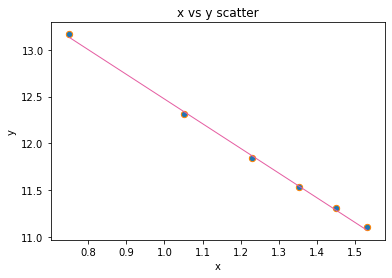

In [58]:
%matplotlib inline
n = 10
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('linear')
DATA[n].plot(
    kind='scatter',
    x='x',
    y='y',
    style='o',
    alpha=1.,
    ax=ax,
    title='x vs y scatter',
    edgecolor='#ff8300',
    s=40
)
wp, = ax.plot(
    DATA[n]['x'],
    FITs[n].predict(),
    color='#e55ea2',
    lw=1.,
    alpha=1.0,
)

In [78]:
tabela['time'].iloc[0]

'29/09/2011 01:32:50'

In [59]:
t = []
for i in range(len(tabela)):
    aux = tabela['time'].iloc[i].split()
    aux1 = aux[0].split('/')
    t.append(aux1[2]+'-'+aux1[1]+'-'+aux1[0]+' '+aux[1])
t = Time(t)

In [60]:
len(FITs)

43

$$M(p) = 2.5(m-2)log(p)+C_0$$

$$C_0 = B+2.5(m-2)\log\pi$$

$$m = \frac{A}{2.5}+2$$

In [61]:
#del new_table
new_table = {'time': [], 'a': [], 'err_a': [], 'b': [], 'err_b': [], 'r2': [],
            'm': []}
for i in range(len(FITs)):
    aux = FITs[i]
    r = aux.rsquared
    if r >= 0.99:
        b = aux.params[0]
        a = aux.params[1]
        m = 2*a/5.+2
        new_table['time'].append(t[i].jd)
        new_table['r2'].append(r)
        new_table['a'].append(a)
        new_table['err_a'].append(aux.bse[0])
        new_table['m'].append(m)
        new_table['b'].append(b)
        new_table['err_b'].append(aux.bse[1])
        
new_table = pd.DataFrame(new_table)
new_table

time         a     err_a          b     err_b        r2         m
0   2.457773e+06 -2.072525  0.014872  17.973650  0.013087  0.999841  1.170990
1   2.457773e+06 -2.092257  0.022926  17.845267  0.019488  0.999653  1.163097
2   2.457779e+06 -1.970203  0.037196  17.094158  0.030823  0.999022  1.211919
3   2.457787e+06 -2.085440  0.055004  16.746189  0.047222  0.997953  1.165824
4   2.457798e+06 -2.077404  0.080375  15.416309  0.065425  0.996048  1.169038
5   2.457800e+06 -2.134889  0.038822  15.474179  0.033736  0.999002  1.146044
6   2.457803e+06 -2.183237  0.089077  15.424575  0.071382  0.995742  1.126705
7   2.457809e+06 -2.360516  0.064111  15.345041  0.054102  0.997903  1.055794
8   2.457822e+06 -2.572984  0.096749  15.167660  0.078753  0.996267  0.970806
9   2.457825e+06 -2.637708  0.074154  15.112461  0.058628  0.998028  0.944917
10  2.457828e+06 -2.605025  0.044771  15.005376  0.034664  0.999292  0.957990
11  2.457835e+06 -2.787066  0.079451  15.580110  0.062793  0.997974  0.885174
12  2.457837e+06 -2.718750  0.053723  15.097356  0.042007  0.999046  0.912500
13  2.457838e+06 -2.749853  0.044972  15.399948  0.034117  0.999385  0.900059
14  2.457839e+06 -2.708173  0.021098  15.114096  0.016068  0.999859  0.916731
15  2.457843e+06 -2.765022  0.020548  15.277805  0.016367  0.999860  0.893991
16  2.457846e+06 -2.898671  0.050514  15.304572  0.038685  0.999288  0.840532
17  2.457846e+06 -2.883705  0.031941  15.313438  0.024206  0.999718  0.846518
18  2.457847e+06 -2.867644  0.022387  14.768476  0.017337  0.999854  0.852943
19  2.457853e+06 -2.989341  0.071918  15.575513  0.055765  0.998610  0.804264
20  2.457857e+06 -2.974138  0.052350  15.734932  0.039868  0.999282  0.810345
21  2.457861e+06 -3.053802  0.023290  15.839381  0.018033  0.999861  0.778479
22  2.457863e+06 -3.136283  0.065741  15.675095  0.051965  0.998903  0.745487
23  2.457867e+06 -3.013302  0.049878  15.607908  0.038619  0.999343  0.794679
24  2.457870e+06 -3.092777  0.052582  15.847780  0.040375  0.999319  0.762889
25  2.457872e+06 -3.068542  0.037406  15.772253  0.031305  0.999584  0.772583
26  2.457882e+06 -2.967099  0.045617  15.945884  0.036335  0.999400  0.813160
27  2.457887e+06 -2.924587  0.044797  15.784071  0.035817  0.999400  0.830165
28  2.457894e+06 -2.737472  0.045700  15.810973  0.034636  0.999360  0.905011
29  2.457895e+06 -2.864312  0.045501  16.006618  0.039579  0.999237  0.854275
30  2.457898e+06 -2.631947  0.006629  15.564436  0.005280  0.999984  0.947221
31  2.457901e+06 -2.809092  0.064877  16.036830  0.051962  0.998633  0.876363
32  2.457906e+06 -2.632194  0.048381  15.945773  0.039606  0.999095  0.947122
33  2.457915e+06 -2.869697  0.043873  16.536945  0.034484  0.999423  0.852121
34  2.457918e+06 -2.786387  0.059203  16.708309  0.047887  0.998820  0.885445
35  2.457921e+06 -2.670524  0.062084  16.628399  0.049243  0.998642  0.931791
36  2.457924e+06 -2.710649  0.054110  16.801528  0.045799  0.998859  0.915740
37  2.457936e+06 -2.948841  0.038763  17.352064  0.030690  0.999567  0.820464
38  2.457940e+06 -3.024178  0.053755  17.651120  0.042327  0.999217  0.790329
39  2.457947e+06 -2.978812  0.052955  18.022556  0.042264  0.999195  0.808475

In [62]:
new_table.to_csv('new_table.csv')

In [19]:
len(new_table)

20

### Fazendo a união com os dados do horizons

In [63]:
#horizons = pd.read_excel('horizons.xlsx')
horizons = pd.read_csv('horizons.csv')
horizons

Date__(UT)__HR:MN:SC.fff         r       rdot     delta     deldot  \
0   2017-Jan-19 00:12:59.000  1.503087 -14.528775  0.548835 -19.587350   
1   2017-Jan-19 22:35:29.000  1.495273 -14.495214  0.538356 -19.333055   
2   2017-Jan-25 23:47:27.000  1.445053 -14.235297  0.473719 -17.656092   
3   2017-Feb-02 01:43:21.000  1.387633 -13.825887  0.405590 -15.662719   
4   2017-Feb-13 20:47:46.000  1.296585 -12.832669  0.310000 -12.425589   
5   2017-Feb-15 19:05:55.000  1.282399 -12.626817  0.296443 -11.907342   
6   2017-Feb-18 22:31:02.000  1.259807 -12.262196  0.275594 -11.067528   
7   2017-Feb-24 21:24:06.000  1.218972 -11.464883  0.240252  -9.492146   
8   2017-Mar-09 22:22:30.000  1.140746  -9.178431  0.181501  -6.119554   
9   2017-Mar-12 19:19:11.000  1.126018  -8.568977  0.171969  -5.367054   
10  2017-Mar-15 20:26:04.000  1.111540  -7.880684  0.163242  -4.548871   
11  2017-Mar-22 01:27:32.000  1.085974  -6.348725  0.150016  -2.812625   
12  2017-Mar-24 20:59:42.000  1.076259  -5.601186  0.146100  -2.006486   
13  2017-Mar-25 21:40:23.000  1.073016  -5.320429  0.144996  -1.711827   
14  2017-Mar-26 20:15:23.000  1.070195  -5.060129  0.144138  -1.443044   
15  2017-Mar-30 02:37:40.000  1.061520  -4.133566  0.142287  -0.524869   
16  2017-Apr-02 01:20:03.000  1.055218  -3.270300  0.142076   0.269503   
17  2017-Apr-02 21:40:09.000  1.053680  -3.017920  0.142262   0.489683   
18  2017-Apr-03 21:15:38.000  1.052050  -2.723111  0.142611   0.739706   
19  2017-Apr-09 21:37:27.000  1.045770  -0.883815  0.147656   2.117673   
20  2017-Apr-13 20:21:59.000  1.045149   0.339788  0.153352   2.856615   
21  2017-Apr-17 21:31:03.000  1.047408   1.590153  0.160776   3.470409   
22  2017-Apr-19 22:23:21.000  1.049644   2.212586  0.165012   3.727068   
23  2017-Apr-23 21:58:35.000  1.056115   3.408239  0.174081   4.141309   
24  2017-Apr-26 22:51:55.000  1.062874   4.293953  0.181573   4.393376   
25  2017-Apr-28 22:55:04.000  1.068169   4.862705  0.186737   4.536343   
26  2017-May-08 23:33:38.000  1.104117   7.485245  0.214698   5.090500   
27  2017-May-13 22:48:05.000  1.127257   8.624104  0.229666   5.347959   
28  2017-May-20 22:23:46.000  1.164950  10.030393  0.252123   5.820495   
29  2017-May-21 22:53:24.000  1.170918  10.216851  0.255579   5.907840   
30  2017-May-24 23:48:29.000  1.189314  10.743650  0.266196   6.203901   
31  2017-May-27 00:56:02.000  1.202212  11.075096  0.273665   6.435926   
32  2017-Jun-01 00:00:36.000  1.235015  11.802950  0.293032   7.107538   
33  2017-Jun-10 00:32:27.000  1.299438  12.873128  0.334038   8.715622   
34  2017-Jun-13 23:52:38.000  1.329415  13.251264  0.355006   9.579302   
35  2017-Jun-16 23:17:19.000  1.352405  13.501179  0.372067  10.285768   
36  2017-Jun-19 23:37:05.000  1.376104  13.727331  0.390627  11.050244   
37  2017-Jul-01 22:35:54.000  1.473397  14.392902  0.478342  14.412975   
38  2017-Jul-05 22:52:25.000  1.506924  14.545726  0.513096  15.591245   
39  2017-Jul-12 23:11:28.000  1.566267  14.743932  0.580441  17.664060   

      S-T-O  
0   15.1797  
1   14.6906  
2   11.1917  
3    6.3296  
4    3.7870  
5    5.6989  
6    8.9746  
7   15.7295  
8   32.7879  
9   36.8618  
10  41.2409  
11  50.0894  
12  53.9061  
13  55.2459  
14  56.4402  
15  60.3014  
16  63.3269  
17  64.1045  
18  64.9511  
19  68.7477  
20  69.9103  
21  70.0621  
22  69.7740  
23  68.5874  
24  67.1972  
25  66.0831  
26  58.7219  
27  54.3001  
28  47.5674  
29  46.5488  
30  43.4845  
31  41.4029  
32  36.3601  
33  27.5805  
34  24.0677  
35  21.6592  
36  19.4675  
37  14.2641  
38  13.9917  
39  14.9319

In [64]:
final = pd.concat([new_table,horizons.iloc[:,[1,2,3,4,5]]],axis=1)
final

time         a     err_a          b     err_b        r2         m  \
0   2.457773e+06 -2.072525  0.014872  17.973650  0.013087  0.999841  1.170990   
1   2.457773e+06 -2.092257  0.022926  17.845267  0.019488  0.999653  1.163097   
2   2.457779e+06 -1.970203  0.037196  17.094158  0.030823  0.999022  1.211919   
3   2.457787e+06 -2.085440  0.055004  16.746189  0.047222  0.997953  1.165824   
4   2.457798e+06 -2.077404  0.080375  15.416309  0.065425  0.996048  1.169038   
5   2.457800e+06 -2.134889  0.038822  15.474179  0.033736  0.999002  1.146044   
6   2.457803e+06 -2.183237  0.089077  15.424575  0.071382  0.995742  1.126705   
7   2.457809e+06 -2.360516  0.064111  15.345041  0.054102  0.997903  1.055794   
8   2.457822e+06 -2.572984  0.096749  15.167660  0.078753  0.996267  0.970806   
9   2.457825e+06 -2.637708  0.074154  15.112461  0.058628  0.998028  0.944917   
10  2.457828e+06 -2.605025  0.044771  15.005376  0.034664  0.999292  0.957990   
11  2.457835e+06 -2.787066  0.079451  15.580110  0.062793  0.997974  0.885174   
12  2.457837e+06 -2.718750  0.053723  15.097356  0.042007  0.999046  0.912500   
13  2.457838e+06 -2.749853  0.044972  15.399948  0.034117  0.999385  0.900059   
14  2.457839e+06 -2.708173  0.021098  15.114096  0.016068  0.999859  0.916731   
15  2.457843e+06 -2.765022  0.020548  15.277805  0.016367  0.999860  0.893991   
16  2.457846e+06 -2.898671  0.050514  15.304572  0.038685  0.999288  0.840532   
17  2.457846e+06 -2.883705  0.031941  15.313438  0.024206  0.999718  0.846518   
18  2.457847e+06 -2.867644  0.022387  14.768476  0.017337  0.999854  0.852943   
19  2.457853e+06 -2.989341  0.071918  15.575513  0.055765  0.998610  0.804264   
20  2.457857e+06 -2.974138  0.052350  15.734932  0.039868  0.999282  0.810345   
21  2.457861e+06 -3.053802  0.023290  15.839381  0.018033  0.999861  0.778479   
22  2.457863e+06 -3.136283  0.065741  15.675095  0.051965  0.998903  0.745487   
23  2.457867e+06 -3.013302  0.049878  15.607908  0.038619  0.999343  0.794679   
24  2.457870e+06 -3.092777  0.052582  15.847780  0.040375  0.999319  0.762889   
25  2.457872e+06 -3.068542  0.037406  15.772253  0.031305  0.999584  0.772583   
26  2.457882e+06 -2.967099  0.045617  15.945884  0.036335  0.999400  0.813160   
27  2.457887e+06 -2.924587  0.044797  15.784071  0.035817  0.999400  0.830165   
28  2.457894e+06 -2.737472  0.045700  15.810973  0.034636  0.999360  0.905011   
29  2.457895e+06 -2.864312  0.045501  16.006618  0.039579  0.999237  0.854275   
30  2.457898e+06 -2.631947  0.006629  15.564436  0.005280  0.999984  0.947221   
31  2.457901e+06 -2.809092  0.064877  16.036830  0.051962  0.998633  0.876363   
32  2.457906e+06 -2.632194  0.048381  15.945773  0.039606  0.999095  0.947122   
33  2.457915e+06 -2.869697  0.043873  16.536945  0.034484  0.999423  0.852121   
34  2.457918e+06 -2.786387  0.059203  16.708309  0.047887  0.998820  0.885445   
35  2.457921e+06 -2.670524  0.062084  16.628399  0.049243  0.998642  0.931791   
36  2.457924e+06 -2.710649  0.054110  16.801528  0.045799  0.998859  0.915740   
37  2.457936e+06 -2.948841  0.038763  17.352064  0.030690  0.999567  0.820464   
38  2.457940e+06 -3.024178  0.053755  17.651120  0.042327  0.999217  0.790329   
39  2.457947e+06 -2.978812  0.052955  18.022556  0.042264  0.999195  0.808475   

           r       rdot     delta     deldot    S-T-O  
0   1.503087 -14.528775  0.548835 -19.587350  15.1797  
1   1.495273 -14.495214  0.538356 -19.333055  14.6906  
2   1.445053 -14.235297  0.473719 -17.656092  11.1917  
3   1.387633 -13.825887  0.405590 -15.662719   6.3296  
4   1.296585 -12.832669  0.310000 -12.425589   3.7870  
5   1.282399 -12.626817  0.296443 -11.907342   5.6989  
6   1.259807 -12.262196  0.275594 -11.067528   8.9746  
7   1.218972 -11.464883  0.240252  -9.492146  15.7295  
8   1.140746  -9.178431  0.181501  -6.119554  32.7879  
9   1.126018  -8.568977  0.171969  -5.367054  36.8618  
10  1.111540  -7.880684  0.163242  -4.548871  41.2409  
11  1.085974  -6.3

In [65]:
final.to_excel('41P.xlsx')

In [109]:
final = pd.read_excel('C2011L4.xlsx',decimal=',')

In [110]:
final.columns

Index(['time', 'a', 'err_a', 'b', 'err_b', 'r2', 'm', 'r', 'rdot', 'delta',
       'deldot', 'S-T-O'],
      dtype='object')

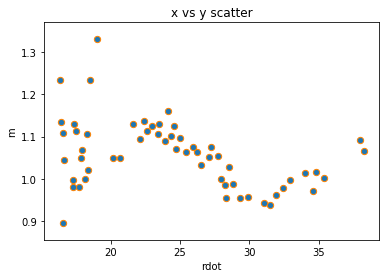

In [113]:
%matplotlib inline
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('linear')
final.plot(
    kind='scatter',
    x='rdot',
    y='m',
    style='o',
    alpha=1.,
    ax=ax,
    title='x vs y scatter',
    edgecolor='#ff8300',
    s=40
)

$$c_0+2.5(m-2)\log(p)$$

In [28]:
for i in new_table['time'].values:
    print(i)

2456382.3072337965
2456384.3172916668
2456397.605381944
2456400.5993287037
2456401.614907407
2456404.599467593
2456410.5412615743
2456413.5774537036
2456416.526087963
2456419.5725347223
2456422.435960648
2456431.4047800926
2456436.3893402778
2456440.4141203705
2456443.4006944443
2456445.412037037
2456446.473275463
2456449.4544675928
2456451.4691666667
2456457.531053241
2456458.4354861113
2456465.4476967594
2456469.4396527777
2456473.482094907
2456481.058680556
2456487.4371064813
2456494.435196759
2456492.490810185
2456498.4024189813
2456502.5002430556
2456506.458900463
2456514.4470833335
2456516.4181828704
2456526.4406944443
2456534.329502315
2456538.374699074
2456547.318217593
2456559.3518171296
2456589.256701389
2456607.2409722223
2456656.745150463
2456681.659837963
2456688.7401967593
2456692.6711574076
2456700.7084375
2456712.6402314813
2456718.659814815
2456725.666921296
2456739.5650578705
2456749.5595717593
2456753.560474537
2456756.614525463
2456802.5730902776
2456808.502662037
2

In [62]:
import numpy as np

import statsmodels.api as sm

Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X)

model = sm.OLS(Y,X)
results = model.fit()
results.params

array([2.14285714, 0.25      ])

In [63]:
X

array([[1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [124]:
from scipy.optimize import leastsq

In [138]:
def f(params,xdata,ydata):
    y = -2.5*(2-params[0])*xdata+params[1]-2.5*np.log10(2-params[0])
    aux = ydata-y
    return aux*aux

In [146]:
res = leastsq(f,[1,2],args=(DATA[10]['x'],DATA[10]['y']))

In [147]:
res

(array([ 0.93632334, 13.55663005]), 1)

In [148]:
2*FITs[10].params[1]/5+2

0.9435248549629491

In [130]:
gp_minimize?

Signature:
gp_minimize(
    ['func', 'dimensions', 'base_estimator=None', 'n_calls=100', 'n_random_starts=10', "acq_func='gp_hedge'", "acq_optimizer='auto'", 'x0=None', 'y0=None', 'random_state=None', 'verbose=False', 'callback=None', 'n_points=10000', 'n_restarts_optimizer=5', 'xi=0.01', 'kappa=1.96', "noise='gaussian'", 'n_jobs=1'],
)
Docstring:
Bayesian optimization using Gaussian Processes.

If every function evaluation is expensive, for instance
when the parameters are the hyperparameters of a neural network
and the function evaluation is the mean cross-validation score across
ten folds, optimizing the hyperparameters by standard optimization
routines would take for ever!

The idea is to approximate the function using a Gaussian process.
In other words the function values are assumed to follow a multivariate
gaussian. The covariance of the function values are given by a
GP kernel between the parameters. Then a smart choice to choose the
next parameter to evaluate can be made by th

In [129]:
leastsq?

Signature:
leastsq(
    ['func', 'x0', 'args=()', 'Dfun=None', 'full_output=0', 'col_deriv=0', 'ftol=1.49012e-08', 'xtol=1.49012e-08', 'gtol=0.0', 'maxfev=0', 'epsfcn=None', 'factor=100', 'diag=None'],
)
Docstring:
Minimize the sum of squares of a set of equations.

::

    x = arg min(sum(func(y)**2,axis=0))
             y

Parameters
----------
func : callable
    should take at least one (possibly length N vector) argument and
    returns M floating point numbers. It must not return NaNs or
    fitting might fail.
x0 : ndarray
    The starting estimate for the minimization.
args : tuple, optional
    Any extra arguments to func are placed in this tuple.
Dfun : callable, optional
    A function or method to compute the Jacobian of func with derivatives
    across the rows. If this is None, the Jacobian will be estimated.
full_output : bool, optional
    non-zero to return all optional outputs.
col_deriv : bool, optional
    non-zero to specify that the Jacobian function computes deri

In [119]:
curve_fit?

Signature:
curve_fit(
    ['f', 'xdata', 'ydata', 'p0=None', 'sigma=None', 'absolute_sigma=False', 'check_finite=True', 'bounds=(-inf, inf)', 'method=None', 'jac=None', '**kwargs'],
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``

Parameters
----------
f : callable
    The model function, f(x, ...).  It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Must be an M-length sequence or an (k,M)-shaped array for functions
    with k predictors.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N).  If None, then the
    initial values will all be 1 (if the number of parameters for the
    function can be determined using introspection, otherwise a
    ValueEr

In [180]:
print(DATA[3]['y'].values)

[13.78 13.04 12.74 12.56 12.44 12.35]
